# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.003
0.004
0.002
0.002
0.002
0.005
0.003
0.0
0.0
0.0
0.003
0.004
0.0
0.004
0.0
0.004
0.003
0.0
0.001
-0.001
0.001
0.001
0.0
0.001
0.0
0.0
0.001
0.0
0.0
0.0
-0.001
0.0
-0.001
-0.002
0.0
-0.004
0.001
0.001
0.002
0.001
0.001
0.0
0.0
-0.004
-0.006
-0.007
-0.006
-0.009
-0.005
-0.005
-0.006
-0.004
0.984
0.984
0.983
0.983
1.989
1.988
1.987
1.987
2.969
2.972
2.974
2.974
2.974
3.96
3.96
3.958
3.96
4.942
4.945
4.946
4.945
4.946
5.935
5.934
5.934
5.934
6.786
6.784
6.785
6.787
7.638
7.636
7.636
7.637
8.617
8.618
8.618
9.621
9.626
9.628
9.625
10.607
10.607
10.604
10.605
10.605
11.585
11.588
11.587
12.569
12.571
12.572
12.571
12.574
13.553
13.553
13.551
13.551
14.486
14.486
14.485
14.483
15.419
15.416
15.417
16.397
16.397
16.396
16.398
17.402
17.402
17.402
18.405
18.405
18.405
18.403
18.405
19.41
19.41
19.409
20.412
20.417
20.412
20.413
20.415
21.419
21.418
21.418
21.418
22.224
22.224
22.226
23.031
23.03
23.03
23.028
24.034
24.034
24.034
24.031
25.04
25.039
25.041
25.04
26.048
26.047
26.044
26.044


59.3
59.3
59.296
59.299
59.701
59.768
59.768
59.768
59.768
59.764
59.767
59.767
60.239
60.287
60.287
60.292
60.292
60.293
60.293
60.293
60.292
60.292
60.29
60.291
60.293
60.29
60.29
60.293
60.292
60.293
60.291
60.291
60.293
60.292
60.292
60.291
60.291
60.291
60.291
60.292
60.29
60.289
60.29
60.293
60.29
60.287
60.288
60.289
60.286
60.286


KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.003
1,2,0.004
2,4,0.002
3,6,0.002
4,8,0.002
...,...,...
1250,2500,60.287
1251,2502,60.288
1252,2504,60.289
1253,2506,60.286


<IPython.core.display.Javascript object>


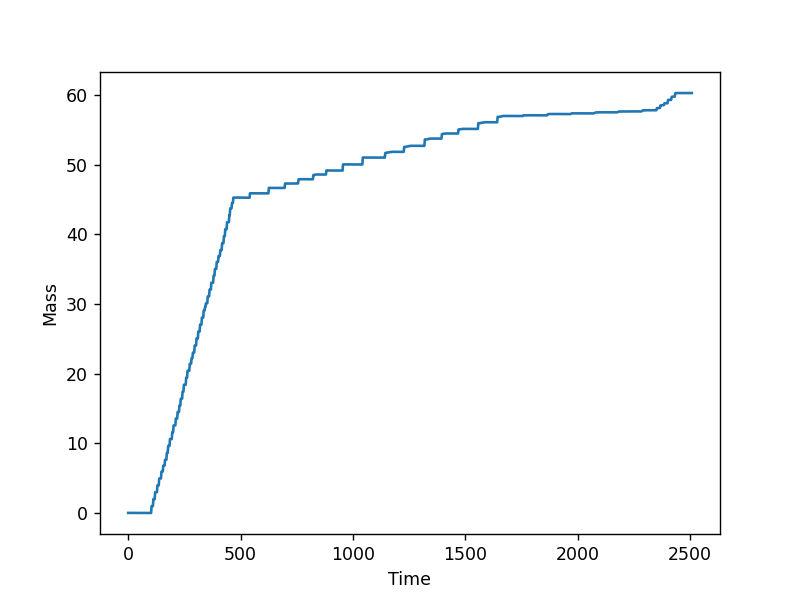

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
#mass_df.to_csv('mass_data/MassProfile_170123_S43-48.csv')